### Chapter 1: 通过代码学数学

**NOTE:** 大部分代码在这里不会被解释，她们绘制了第一章的图形，这只是让你浏览一下，请运行一下并看看效果，如果感兴趣的话。

如果你以后再来看看这些，一定会觉得小菜一碟。

#### 1.1 使用数学和软件来解决商业问题 (Solving lucrative problems with math and software)

##### 1.1.1 预测金融市场走势 (Predicting financial market movements)

In [1]:
import matplotlib.pyplot as plt  # 绘图
import numpy             as np  # 矩阵
from   scipy             import stats  # scipy是一个科学计算库。 这里导入其中的 stats， 她是一个统计学(Statistics)模块
from   math              import sqrt, log

plt.rcParams['font.family'] = ['Simhei']  # 中文显示

##### P2 图1-1 股票价格随时间变化的典型图像

In [2]:
xs = range(0,501) # 500分钟
ys = [30] # 0分钟时的初始y值（y代表股票价格）
print(ys)
ys[-1] # 取列表ys的最后一个元素

## 随机数播种机设定seed=42，不同的seed产生的随机数列不同，
## 你多运行几次会发现相同的seed产生的一样的随机数列，输出的图表相同。
np.random.seed(seed=42) 

print(np.random.normal(0,5,6)) # 6个均值为0，标准差为5的正态分布随机数

print( np.random.normal(0,0.5,500).tolist() ) # 500个均值为0，标准差为0.5的正态分布随机数

for delta in np.random.normal(0,0.5,500):
    #print(delta)
    ys.append(ys[-1] + delta)
    
print(ys) # 输出列表ys的所有元素


[30]
[ 2.48357077 -0.69132151  3.23844269  7.61514928 -1.17076687 -1.17068478]
[0.7896064077536957, 0.3837173645764544, -0.23473719296747605, 0.27128002179298233, -0.23170884640623113, -0.23286487678512843, 0.12098113578301706, -0.956640122328899, -0.8624589162565164, -0.28114376462048635, -0.5064155601672119, 0.15712366629763694, -0.45401203776060545, -0.7061518506676457, 0.732824384460777, -0.11288815024326783, 0.03376410234396192, -0.7123740931067284, -0.27219136226259133, 0.05546129485493304, -0.5754967887111514, 0.18784900917283598, -0.3003193449594025, -0.1458468748966384, -0.30085330611469846, 0.9261390922544689, -0.0067486123689669605, -0.5288554644779502, 0.4112724560515945, -0.6104218249855111, 0.1044317975023777, -0.9798350619398878, -0.6640930244492153, 0.09843061793456176, 0.3692332899977052, 0.08568414059498525, -0.057824141194120264, -0.1505518477946444, -0.7392609951837137, -0.3599221041973543, -0.23031938547989375, 0.5285611131094579, 0.1718091447842307, -0.88152007768

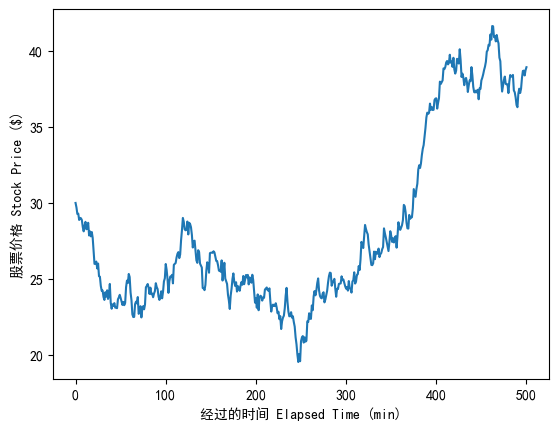

In [3]:
plt.plot(ys)
plt.ylabel('股票价格 Stock Price ($)')
plt.xlabel('经过的时间 Elapsed Time (min)')
plt.savefig('figures/1-1.svg') # svg 是一种比 png 等像素图像更清晰的矢量图像, 可以在浏览器中打开

## 注：这里存储fig使用的路径是相对路径，
## figures/1.01.svg表示在当前notebook文件的所在的文件夹Chapter 02中的figures文件夹中的1.01.svg
## 如果你不懂请询问我。

#### P3 图1-2 利用线性回归确定股票价格的变化趋势

标准差 Standard Deviation = 3.976648355004343


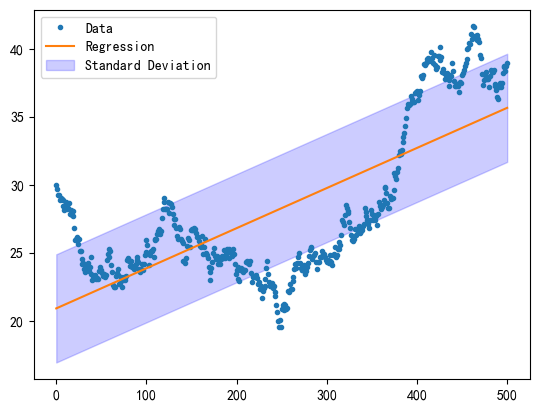

In [4]:
r = stats.linregress(xs, ys)  # 计算两组测量值xs, ys的线性最小二乘回归。
""" linregress 返回的r 有几个属性：
slope (float)
    Slope of the regression line. 线性回归曲线的斜率Slope
intercept (float)
    Intercept of the regression line. 线性回归曲线的纵截距intercept
......
"""
line = [r.slope * x + r.intercept for x in xs]  # 获得线性回归曲线的各点纵坐标

# print([(y-y0) for y, y0 in zip(ys,line)]) # 计算标准差,  y0是回归曲线的y值 ，y是实际数据的y值



std = np.std([(y-y0) for y, y0 in zip(ys,line)]) # 计算标准差

print('标准差 Standard Deviation =', std    ) 
# 绘制回归曲线和标准差范围
plt.plot(xs, ys, '.', label='Data')  # 绘制原始数据点
plt.plot(xs, line, label='Regression')  # 绘制回归曲线
top = [y + std for y in line]  # 回归曲线纵坐标上移标准差std
bottom = [y - std for y in line]  # 下移std
#plt.fill_between(xs, top, bottom, alpha=0.2, label='Standard Deviation')  # 填充标准差范围
plt.fill_between(xs, top, bottom, color='blue', alpha=0.2, label='Standard Deviation')  # 填充标准差范围
plt.legend()  # 显示图例
plt.show()  # 显示图形

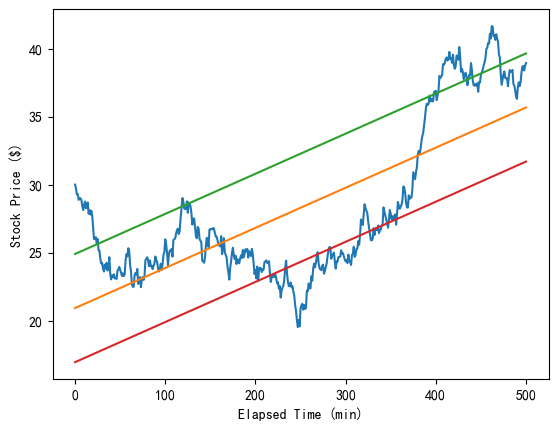

In [5]:
plt.plot(xs, ys)  # 原数据
plt.plot(xs, line)  # 线性回归曲线
plt.plot(xs, top)  # 上浮动
plt.plot(xs, bottom)  # 下浮动

plt.ylabel('Stock Price ($)')
plt.xlabel('Elapsed Time (min)')
plt.savefig('figures/1-2.svg')

### 1.1.2 寻找优质交易 (Finding a good deal)

In [6]:
## 英里里程
mileages = [4.1429, 8.9173, 6.5, 6.0601, 12.3, 6.2, 2.5782, 0.9, 1.7, 13.1045, 24.7, 9.2699, 17.2, 10.0, 10.0, 2.8, 12.3773, 19.6, 7.3397,
            2.1178, 12.9886, 10.9884, 16.9, 6.0, 12.9, 8.1936, 10.5, 8.0713, 1.7, 10.0, 15.6097, 17.0, 16.7, 5.6, 11.3, 19.9, 9.6, 21.6, 20.3]
# 对应二手车价格
prices = [16980.0, 15973.0, 9900.0, 15998.0, 3900.0, 12540.0, 21688.0, 17086.0, 23000.0, 8900.0, 3875.0, 10500.0, 3500.0, 26992.0, 17249.0, 19627.0, 9450.0, 3000.0, 14999.0,
          24990.0, 7967.0, 7257.0, 4799.0, 13982.0, 5299.0, 14310.0, 7800.0, 12250.0, 23000.0, 14686.0, 7495.0, 4950.0, 3500.0, 11999.0, 9600.0, 1999.0, 4300.0, 3500.0, 4200.0]


In [7]:
## 指数拟合曲线，这里居然直接写出来，没给出算法
def price(mileage):
    return 26500 * (0.905 ** mileage)

In [11]:
import matplotlib.pyplot as plt  # 绘图

In [ ]:
#plt.scatter?

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def show_cmap(cmap, norm=None, extend=None):
    '''展示一个colormap.'''
    if norm is None:
        norm = mcolors.Normalize(vmin=0, vmax=cmap.N)
    im = cm.ScalarMappable(norm=norm, cmap=cmap)

    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    fig.colorbar(im, cax=ax, orientation='horizontal', extend=extend)
    plt.show()

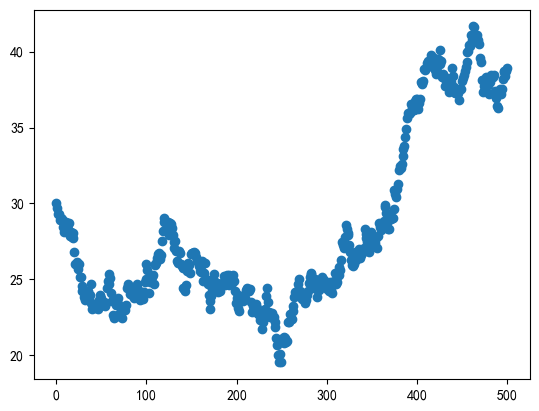

In [17]:
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

plt.scatter(xs, ys)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.  ]


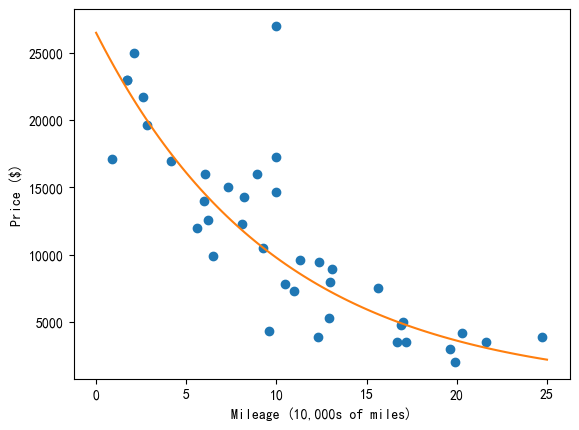

In [18]:
xs = np.linspace(0,25,101) # 100个点，横坐标从0到25 # ZG 其实不合理，应该101个点
print(xs)
ys = price(xs) # xs对应的拟合曲线纵坐标 # ZG 这里的xs是numpy的array， 传入函数后，返回的ys也是numpy的array 

plt.scatter(mileages,prices)  # 原数据散点图
plt.plot(xs,ys, color='C1')  # 拟合曲线折线图
plt.xlabel('Mileage (10,000s of miles)')
plt.ylabel('Price ($)')
plt.savefig('figures/1-5.svg')

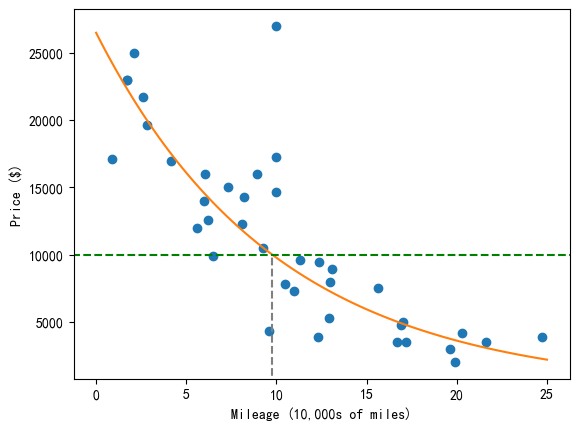

In [ ]:
xs = np.linspace(0, 25, 101)
ys = price(xs)

# 这是在计算预算10000美元下的里程数是多少，看到书P5中间 <<<<<<<<<<<<<<<<<<==========================================
target_mileage = log(10/26.5)/log(0.905)


plt.scatter(mileages, prices)
plt.plot(xs, ys, color='C1')

# 记录下原来的坐标系x范围和y范围，避免绘制辅助线时导致范围扩大，
# 不信你把这一行和后面的 plt.xlim(*xlim) plt.ylim(*ylim) 都注释掉看看
xlim, ylim = plt.xlim(), plt.ylim()

# 绘制连接(-5, 10000)和(30, 10000)的虚(dashed)折线, 辅助线使用了灰色gray保持低调
#plt.plot([-5, 30], [10000, 10000], color="gray", linestyle="dashed")
plt.plot([-5, 30], [10000, 10000], color="green", linestyle="dashed")
# 绘制纵向的辅助折线，从(target_mileage, -5000)到(target_mileage, 10000)
plt.plot([target_mileage, target_mileage], [-5000, 10000], color="gray", linestyle="dashed")

# 保持原坐标系大小
plt.xlim(*xlim)
plt.ylim(*ylim)
# x, y轴要标注好， 最后保存起来
plt.xlabel('Mileage (10,000s of miles)')
plt.ylabel('Price ($)')
plt.savefig('figures/1-6.svg')


In [21]:
## 书P6开头计算行驶10000英里的二手车价格是原车的多少
0.905 ** 5

0.6070757653156251

### 1.1.3 Building 3D graphics and animations

In [23]:
import sys # sys模块提供了系统相关的参数和函数
sys.path.append('../Chapter 03') # 这里在处理python环境的sys.path中添加了../Chapter 03 （../ 代表该文件夹的父文件夹 Math-for-Programmers-zh/ ，Chapter 03 在 Math-for-Programmers-zh/ 中）

from draw3d import * # 由于../Chapter 03已经在环境变量中，从 ../Chapter 03/drwa3d中导入所有的函数和变量

sys.path # 我来查看环境变量， 最后一个是我们已经添加进来的了../Chapter 03

['c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\python311.zip',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\DLLs',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\Lib',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda',
 '',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\win32',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\zhen-\\anaconda3\\envs\\torch_cuda\\Lib\\site-packages\\Pythonwin',
 '../Chapter 03',
 '../Chapter 03']

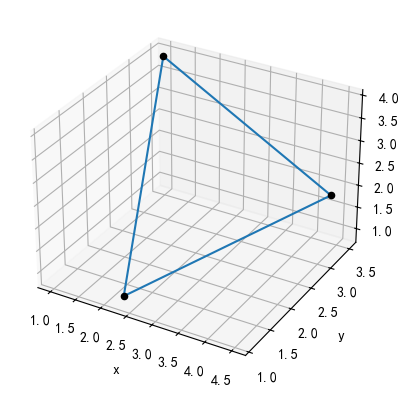

In [24]:
triangle = [(2.3,1.1,0.9), (4.5,3.3,2.0), (1.0,3.5,3.9)]

# 绘制triangle的三个点的连线，具体以后会知道的😁
draw3d(
    Polygon3D(*triangle),
    Points3D(*triangle),
    axes=False,
    origin=False,
    save_as='figures/1-8.svg'
)